### **Encoding Categorical Data**

###### For example in this dataset we have Country column in the independent variable (X) which has 3 countries. 
###### Some algorithms might have a need of converting categorical data into numerical.

###### In this case, we can give a number to each country like Spain=0, Germany=1 etc. This is called **label encoding**

###### But sometimes ML model can consider the order of numbers as there is some meaning behind it which may lead to poor performance

###### In this case we will use one hot encoding.

###### This one hot ecoding creates a binary vector for each category(spain, germany..)

###### These binary vectors are also called **dummy variables**


#### When you can do label encoding then?
###### For example, we have dependent variable here, which has only binary values already as Yes and NO

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

In [3]:
dataset= pd.read_csv('Data_preprocess.csv')
X=dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values

In [4]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [5]:
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [6]:
dataset.shape

(10, 4)

In [7]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


Missing Data

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

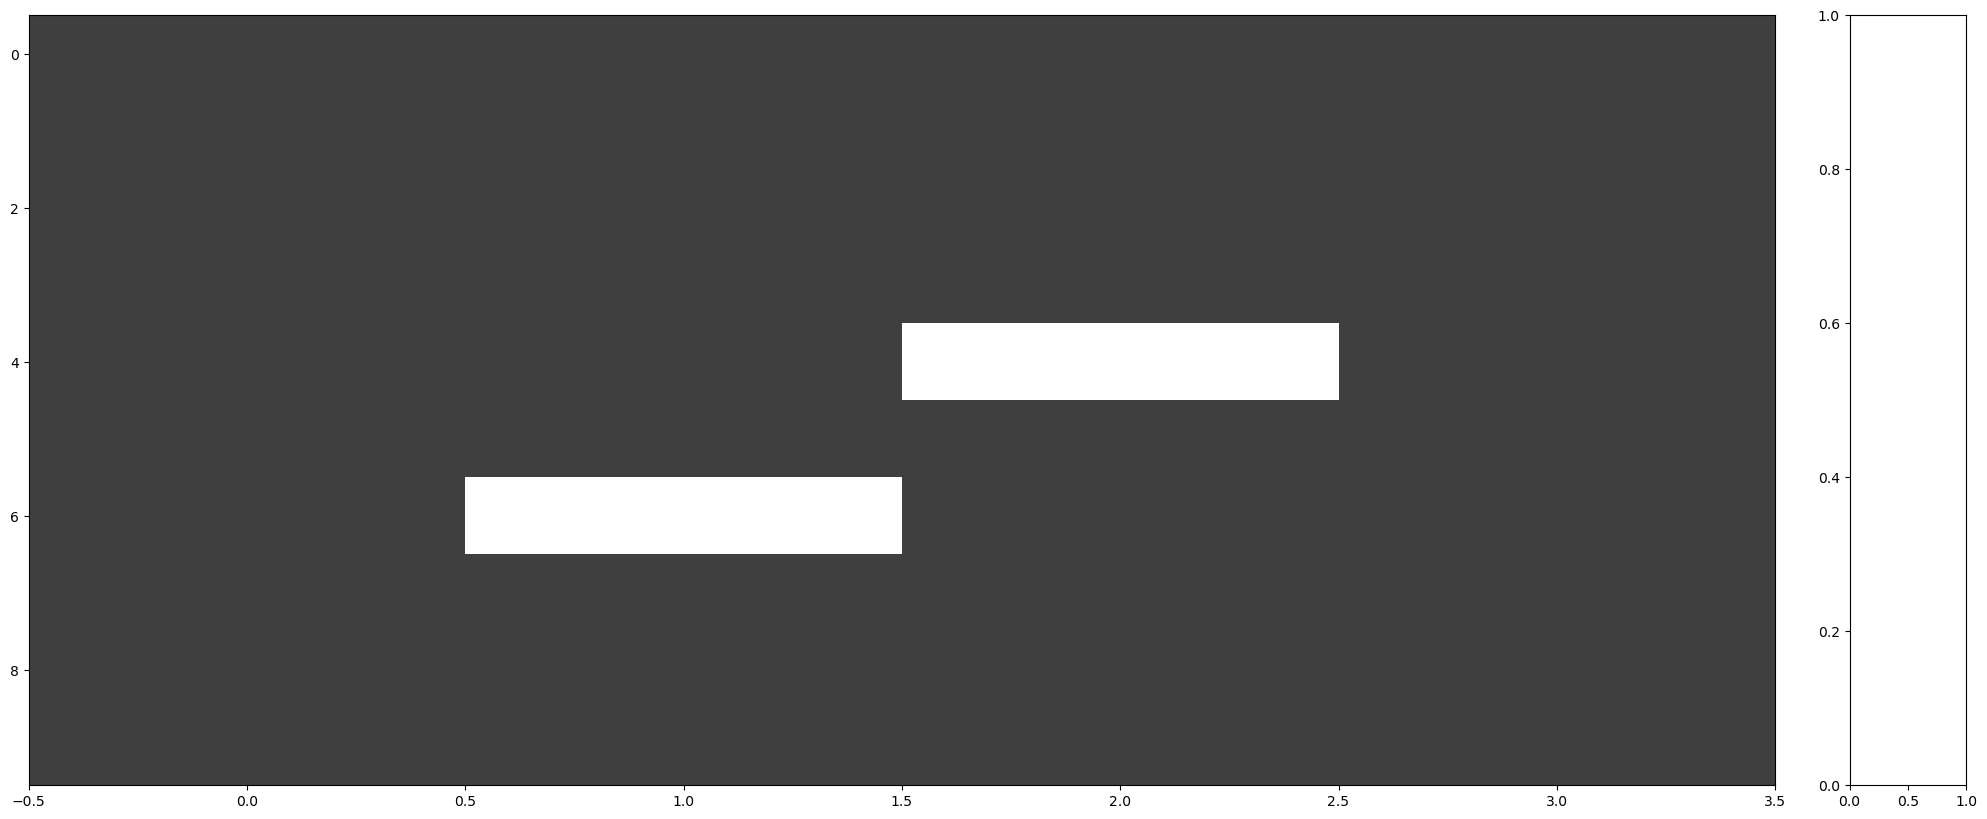

In [8]:
msno.matrix(dataset)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

# fit method will find the missing values in the column and it will also compute the avg of the column
imputer.fit(X[:,1:3])

# tranform method will replace the missing values
X[:,1:3]=imputer.transform(X[:,1:3])

In [11]:
type(X)

numpy.ndarray

Encoding Data


In [12]:
 # Encoding Independent variable (country)
 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# in transformers, specify kind of ytransformation, what kind of encoding we want, indexes of columns
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

# using fit_transform (previous steps we didnt use coz this method is available in ColumnTransformer Class)
# fit_transform method doesn't return output as numpy array but X is of numpy array format, so we will 
X= np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [13]:
# Encoding for dependent variables
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Splitting the datset 

###### Feature Scaling should be applied after splitting the data set into testing and training
###### we should not do before --> it will coz information 

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [15]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [16]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [17]:
Y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [18]:
Y_test

array([0, 1])

##### Feature Scaling
###### allows to put all features on same scale
###### this is done to avoid domination of some features on others
###### Feature scaling should be used for few models only. 
###### Standardisation (-3,+3) and normalization (0,1) are 2 techniques

###### **When to choose which technique?**
###### Choose normalization when there is normal distribution. Standardisation works all the time.

###### **Do we have to apply feature scaling to dummy variables?**
###### NO, coz the goal of feature scaling is to have all the values in same range. Here dummy variables are already in between (-3,+3)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,3:]=sc.fit_transform(X_train[:,3:])
# we will do only tranform for X_test since the features of test set need to be scaled by same scaler as X_train. 
# If we do fit_transform for X_test fit will create new scaler for it
X_test[:,3:]=sc.transform(X_test[:,3:])


In [22]:
X_train

array([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425],
       [0.0, 1.0, 0.0, -0.014117293757057777, -0.07013167641635372],
       [1.0, 0.0, 0.0, 0.566708506533324, 0.633562432710455],
       [0.0, 0.0, 1.0, -0.30453019390224867, -0.30786617274297867],
       [0.0, 0.0, 1.0, -1.9018011447007988, -1.420463615551582],
       [1.0, 0.0, 0.0, 1.1475343068237058, 1.232653363453549],
       [0.0, 1.0, 0.0, 1.4379472069688968, 1.5749910381638885],
       [1.0, 0.0, 0.0, -0.7401495441200351, -0.5646194287757332]],
      dtype=object)

In [23]:
X_test

array([[0.0, 1.0, 0.0, -1.4661817944830124, -0.9069571034860727],
       [1.0, 0.0, 0.0, -0.44973664397484414, 0.2056403393225306]],
      dtype=object)